# Import libraries
> The side experiments are in h2 while the actual working codes/steps are in h1

In [1]:
import datetime
import os
import json
import dtlpy as dl


# Step 1: Login to Dataloop

In [2]:
# # Load credentials from environment variables
# email = os.environ.get("DATALOOP_EMAIL")
# password = os.environ.get("DATALOOP_PASSWORD")

# # Check if credentials are set
# if not email or not password:
#     print("Error: DATALOOP_EMAIL and DATALOOP_PASSWORD environment variables are not set.")
#     exit(1)


# get the credentials
with open('config.json') as config_file:
    config = json.load(config_file)

email = config["dataloop_email"]
password = config["dataloop_password"]

# Step 1: Login to Dataloop
print("Logging in to Dataloop...")
dl.login(email, password)
print(f"Login successful!\n{'--'*45}")



Logging in to Dataloop...


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


Opening in existing browser session.
Login successful!
------------------------------------------------------------------------------------------


# Step 2: Create a new dataset (or get an existing one)  

In [3]:

# Step 2: Create a new dataset (or get an existing one)  
project_name = "demo_SDK_finaltest"
dataset_name = "demo_SDK_dataset_finaltest"

print(f"Creating dataset '{dataset_name}' in project '{project_name}'...")
project = dl.projects.create(project_name=project_name)
print(f"Creating project '{project_name}'successfully!\n{'--'*20} ...")

try:
    dataset = project.datasets.create(dataset_name=dataset_name)
    print(f"Dataset '{dataset_name}' created successfully!\n{'--'*20}")
except dl.exceptions.ExistingDataset:
    dataset = project.datasets.get(dataset_name=dataset_name)
    print(f"Dataset '{dataset_name}' already exists. Getting the existing dataset...")



Creating dataset 'demo_SDK_dataset_finaltest' in project 'demo_SDK_finaltest'...
Creating project 'demo_SDK_finaltest'successfully!
---------------------------------------- ...
Dataset 'demo_SDK_dataset_finaltest' created successfully!
----------------------------------------


In [4]:
project = dl.projects.get(project_name=project_name)
# project = dl.projects.get(project_id='e4a5e5b3-a22a-4b59-9b76-30417a0859d9')

In [5]:
dataset = project.datasets.get(dataset_name=dataset_name)

In [6]:
# try:
#     dataset = project.datasets.get(dataset_name=dataset)
# except:
#     dtlpy.exceptions.NotFound: ('404', "Dataset not found. Name: 'dataset'")

# Step 3: Add labels to the dataset recipe

In [7]:
# Step 3: Add labels to the dataset recipe
labels_to_add = ["1", "2", "3", "top", "bottom"]
print(f"Adding labels to the dataset recipe: {labels_to_add}")
dataset.add_labels(labels_to_add)
print(f"Labels added successfully!\n{'--'*20}")


Adding labels to the dataset recipe: ['1', '2', '3', 'top', 'bottom']
Labels added successfully!
----------------------------------------


# Step 4: Upload images

In [8]:

# Step 4: Upload images
image_dir = "./" 

print(f"Uploading images from '{image_dir}'...")
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        local_path = os.path.join(image_dir, filename)
        dataset.items.upload(local_path=local_path)
        print(f"Uploaded {filename}")

print(f"Image upload completed!\n{'--'*20}")



Uploading images from './'...
Upload Items: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]
Uploaded 2.jpg
Upload Items: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]
Uploaded 3.jpg
Upload Items: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]
Uploaded 1.jpg
Image upload completed!
----------------------------------------


# Step 5: Add UTM metadata to items

In [9]:
# Step 5: Add UTM metadata to items
current_time = datetime.datetime.utcnow().isoformat()
metadata = {"collected": current_time}
print("Adding UTM metadata to items...")
for item in dataset.items.list().all():
    item.metadata["user"] = metadata
    item.update()
print(f"Metadata added to items!\n{'--'*20}")


Adding UTM metadata to items...
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]
Metadata added to items!
----------------------------------------


In [10]:

# # Step 6: Upload annotations from JSON file
# annotations_file = "./ML Solution Engineering Home Assignment.json" 

# print(f"Uploading annotations from '{annotations_file}'...")
# with open(annotations_file, "r") as json_file:
#     annotations_data = json.load(json_file)

# print(annotations_data)
# # for annotation in annotations_data:
# #     label_name = annotation["Label name"]
# #     annotation_type = annotation["Annotation type"]
# #     annotation_info = annotation["Annotation information"]
# #     confidence = annotation["confidence"]

# #     # Create the annotation
# #     annotation_definition = dl.Classification(
# #         label=label_name,
# #         type=annotation_type,
# #         confidence=confidence,
# #         model_info=annotation_info,
# #     )

# #     # Upload the annotation to the corresponding item
# #     item = dataset.items.get(item_id=annotation["Item ID"])
# #     builder = item.annotations.builder()
# #     builder.add(annotation_definition=annotation_definition)
# #     item.annotations.upload(builder)

# # print(f"Annotations uploaded successfully!\n{'--'*20}")


# for item_name, annotations in annotations_data.items():
#     for annotation in annotations:
#         label_name = annotation['label']
#         confidence = annotation['confidence']
        
#         if 'box' in annotation:
#             annotation_type = 'box'
#             annotation_info = annotation['box']
#         elif 'point' in annotation:
#             annotation_type = 'point'
#             annotation_info = annotation['point']
#         elif 'polygon' in annotation:
#             annotation_type = 'polygon'
#             annotation_info = annotation['polygon']
#         else:
#             print(f"Skipping annotation for item '{item_name}' with unsupported type.")
#             continue
        
#         print(f"Successfully got the annotations for {item_name}:\nDetials are as below:\n Label Name: {label_name}\nConfidence: {confidence}\n\
#               Annotation Type: {annotation_type}\nAnnotation Info: {annotation_info}\n\n")
        

#         item = dataset.items.get(filepath='images/'+item_name)
        
#         if annotation_type == "box":
#             annotation_definition = dl.Box(label=label_name, points=annotation_info)
#         elif annotation_type == "point":
#             annotation_definition = dl.Point(label=label_name, value=annotation_info)
#         elif annotation_type == "polygon":
#             annotation_definition = dl.Polygon(label=label_name, points=annotation_info)

#         builder = item.annotations.builder()
#         builder.add(annotation_definition=annotation_definition)
#         item.annotations.upload(builder)

#     print("Annotation added, moving to next one")

# print(f"Annotations uploaded successfully!\n{'--'*20}")


## Checking the item Obj

In [11]:
item = dataset.items.get_all_items()

Iterate Entity: 100%|█████████████████████████████| 3/3 [00:00<00:00,  8.82it/s]


In [15]:
# item.print(columns=['metadata])
# item.print()


# Step 6: Upload annotations from JSON file

Uploading annotations from './ML Solution Engineering Home Assignment.json'...
Successfully got the annotations for 1.jpg:
Details are as below:
 Label Name: 1
Confidence: 0.98
              Annotation Type: box
Annotation Info: [{'x': 149.18225016336004, 'y': 115.85979769120996}, {'x': 201.38132392263813, 'y': 201.75386042385915}]


Successfully got the annotations for 1.jpg:
Details are as below:
 Label Name: bottom
Confidence: 0.85
              Annotation Type: point
Annotation Info: {'x': 173.6123972734067, 'y': 201.27956683881678}


Successfully got the annotations for 1.jpg:
Details are as below:
 Label Name: top
Confidence: 0.97
              Annotation Type: point
Annotation Info: {'x': 174.66143334966824, 'y': 116.00264757387058}


Successfully got the annotations for 1.jpg:
Details are as below:
 Label Name: 1
Confidence: 0.82
              Annotation Type: polygon
Annotation Info: [[{'x': 172, 'y': 117}, {'x': 171, 'y': 117}, {'x': 171, 'y': 118}, {'x': 169, 'y': 118}, {'x'

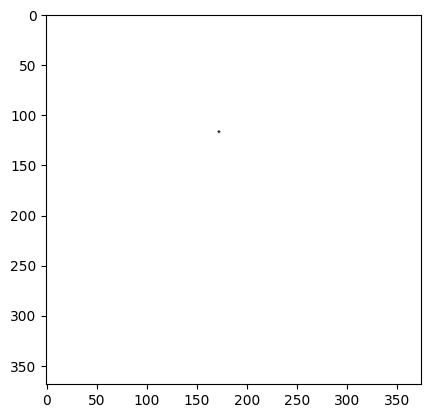

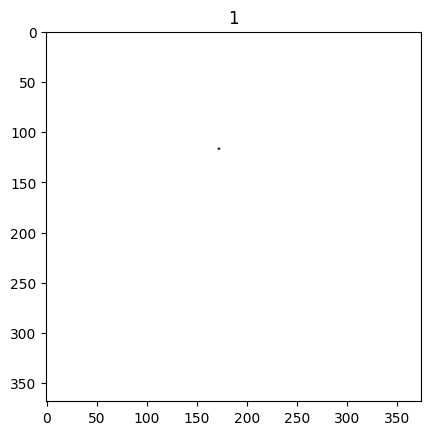

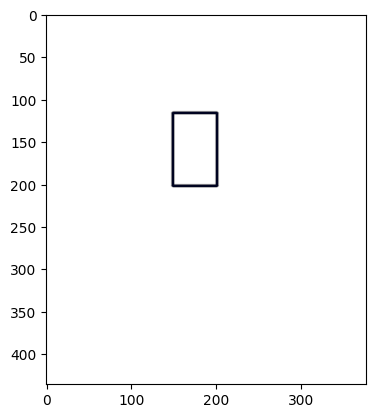

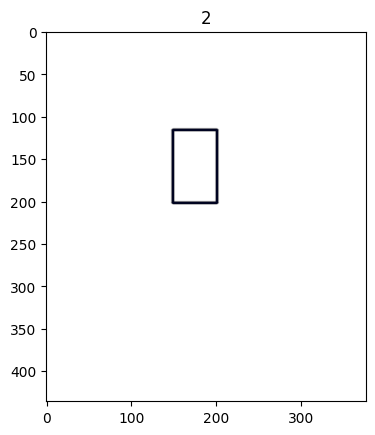

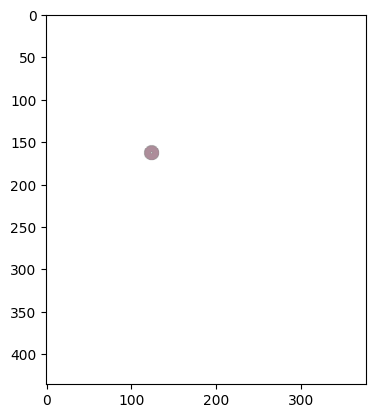

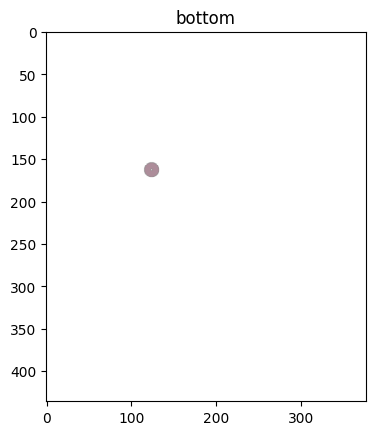

In [16]:

# Step 6: Upload annotations from JSON file
annotations_file = "./ML Solution Engineering Home Assignment.json"

print(f"Uploading annotations from '{annotations_file}'...")
with open(annotations_file, "r") as json_file:
    annotations_data = json.load(json_file)

for item_name, annotations in annotations_data.items():
    for annotation in annotations:
        label_name = annotation['label']
        confidence = annotation['confidence']

        if 'box' in annotation:
            annotation_type = 'box'
            annotation_info = annotation['box']
        elif 'point' in annotation:
            annotation_type = 'point'
            annotation_info = annotation['point']
        elif 'polygon' in annotation:
            annotation_type = 'polygon'
            annotation_info = annotation['polygon']
        else:
            print(f"Skipping annotation for item '{item_name}' with unsupported type.")
            continue

        print(f"Successfully got the annotations for {item_name}:\nDetails are as below:\n Label Name: {label_name}\nConfidence: {confidence}\n\
              Annotation Type: {annotation_type}\nAnnotation Info: {annotation_info}\n\n")
        
        
        item = dataset.items.get(filepath='/'+item_name) # https://console.dataloop.ai/projects/d66a0a1e-9d95-4746-87da-0a0a05958b72/datasets/6503e721485fae2c61d4ef57/items/6503e729e3cf617e9ae79bc2
        
        # try:
        #     item = dataset.items.get(filepath=dataset_name+'/'+item_name) # https://console.dataloop.ai/projects/d66a0a1e-9d95-4746-87da-0a0a05958b72/datasets/6503e721485fae2c61d4ef57/items/6503e729e3cf617e9ae79bc2
        # except:
        #     print(f"Item {item_name} Not Found...")

        if annotation_type == "box":
            annotation_definition = dl.Box(top=annotation_info[0]['y'],
                                            left=annotation_info[0]['x'],
                                            bottom=annotation_info[1]['y'],
                                            right=annotation_info[1]['x'],
                                            label=label_name)
        elif annotation_type == "point":
            annotation_definition = dl.Point(x=annotation_info['x'],
                                              y=annotation_info['y'],
                                              label=label_name)
        elif annotation_type == "polygon":
            points = [(point[0]['x'], point[1]['y']) for point in annotation_info]
            annotation_definition = dl.Polygon(geo=points, label=label_name)

        builder = item.annotations.builder()
        builder.add(annotation_definition=annotation_definition)
        item.annotations.upload(builder)

    print("Annotations added, moving to the next one")
    print("Checking the plot")
    import matplotlib.pyplot as plt
    plt.figure()
    plt.imshow(builder.show())
    for annotation in builder:
        plt.figure()
        plt.imshow(annotation.show())
        plt.title(annotation.label)

print(f"Annotations uploaded successfully!\n{'--'*20}")


## Testing by printing all the annotations infor and item.print() detials

In [17]:
# item = dataset.items.get(filepath='/'+item_name)
# print(item.annotations.show(image='np_array'))

# Iterate through all items in the dataset
for item in dataset.items.list().all():
#     print(f"Item Name: {item.name}, Item ID: {item.id}")
    
    annotations = item.annotations.list()
    for annotation in annotations:
        if annotation.type == dl.AnnotationType.POINT:
            # Handle point annotations
            print(f"Point Annotation - ID: {annotation.id}, Label: {annotation.label}, Position: ({annotation.x}, {annotation.y})")
        elif annotation.type == dl.AnnotationType.BOX:
            # Handle box annotations
            print(f"Box Annotation - ID: {annotation.id}, Label: {annotation.label}, Position: ({annotation.left}, {annotation.top}) to ({annotation.right}, {annotation.bottom})")
        elif annotation.type == dl.AnnotationType.POLYGON:
            # Handle polygon annotations
            print(f"Polygon Annotation - ID: {annotation.id}, Label: {annotation.label}, Points: {annotation.geo}")

Iterate Entity:  67%|███████████████████▎         | 2/3 [00:00<00:00,  2.75it/s]Point Annotation - ID: 65040fd47deda264eaf78bdb, Label: top, Position: (173.6123972734067, 201.27956683881678)
Point Annotation - ID: 65040fd55fa84b10f4890bb0, Label: bottom, Position: (123.74583031836863, 162.94832356737442)
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.97it/s]Box Annotation - ID: 65040fd05fa84bede2890ba6, Label: 1, Position: (149.18225016336004, 115.85979769120996) to (201.38132392263813, 201.75386042385915)
Point Annotation - ID: 65040fd1bc37d13f36c9b63c, Label: top, Position: (174.66143334966824, 116.00264757387058)
Point Annotation - ID: 65040fd1bc37d1e533c9b637, Label: bottom, Position: (173.6123972734067, 201.27956683881678)
Polygon Annotation - ID: 65040fd22f4f9c54f89b96aa, Label: 1, Points: [[172 117]]
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]


# Step 7: Query and print image items labeled as "top"

In [18]:

# # Step 7: Query and print image items labeled as "top"

print("Querying and printing image items labeled as 'top':\n")
filter_query = dl.Filters().add(field="label", values="top")
for item in dataset.items.list(filters=filter_query).all():
    annotations = item.annotations.list()
#     item.print(columns=['filename'])
    print(f"\n\nTop Annotation - ID:\n {annotation.id}, \nLabel: {annotation.label}, \nPosition: ({annotation.x}, {annotation.y})")

Querying and printing image items labeled as 'top':

Iterate Entity:  33%|█████████▋                   | 1/3 [00:00<00:01,  1.92it/s]

Top Annotation - ID:
 65040fd22f4f9c54f89b96aa, 
Label: 1, 
Position: ([172], [117])
Iterate Entity:  67%|███████████████████▎         | 2/3 [00:00<00:00,  2.59it/s]

Top Annotation - ID:
 65040fd22f4f9c54f89b96aa, 
Label: 1, 
Position: ([172], [117])
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.86it/s]

Top Annotation - ID:
 65040fd22f4f9c54f89b96aa, 
Label: 1, 
Position: ([172], [117])
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.10it/s]


# Step 8: Query and print all point annotations

In [19]:
# # Step 8: Query and print all point annotations
print("\nQuerying and printing all point annotations:")

# Iterate through all items in the dataset
for item in dataset.items.list().all():
#     print(f"Item Name: {item.name}, Item ID: {item.id}")
    
    annotations = item.annotations.list()
    for annotation in annotations:
        if annotation.type == dl.AnnotationType.POINT:
            # Handle point annotations
            print(f"\n\nPoint Annotation - ID:\n {annotation.id}, \nLabel: {annotation.label}, \nPosition: ({annotation.x}, {annotation.y})")


Querying and printing all point annotations:
Iterate Entity:  67%|███████████████████▎         | 2/3 [00:00<00:00,  3.94it/s]

Point Annotation - ID:
 65040fd47deda264eaf78bdb, 
Label: top, 
Position: (173.6123972734067, 201.27956683881678)


Point Annotation - ID:
 65040fd55fa84b10f4890bb0, 
Label: bottom, 
Position: (123.74583031836863, 162.94832356737442)
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:00<00:00,  3.59it/s]

Point Annotation - ID:
 65040fd1bc37d13f36c9b63c, 
Label: top, 
Position: (174.66143334966824, 116.00264757387058)


Point Annotation - ID:
 65040fd1bc37d1e533c9b637, 
Label: bottom, 
Position: (173.6123972734067, 201.27956683881678)
Iterate Entity: 100%|█████████████████████████████| 3/3 [00:01<00:00,  2.10it/s]


# Step 9: Logout from Dataloop

In [20]:
# Step 9: Logout from Dataloop
dl.logout()
print("\nLogged out from Dataloop.")


Logged out from Dataloop.
